<font size="6">MEC301 - Métodos Numéricos</font>
# Algortimos de búsqueda de raíces
<br><br><br><br>
Profesor: Francisco Ramírez Cuevas<br>
Fecha: 5 de Septiembre 2022

## Introducción
Consideremos el problema de caída de presión $\Delta P$ al mover un fluído con densidad $\rho$ y viscosidad cinemática $\nu$, a través de una tubería de largo $L$.

<img src="./images/presure_drop.png" width="350px" align= center>

Para un fluido que fluye a una velocidad $V$,la caída de presión está dada por:

\begin{equation*}
\frac{\Delta P}{\rho g} =f \frac{L}{D}\frac{V^2}{2g}
\end{equation*}

donde $f$ es el factor de fricción.

Para determinar $f$ debemos resolver la ecuación de Colebrook:

\begin{equation*}
\frac{1}{\sqrt{f}} = -2.0\log\left(\frac{\varepsilon/D}{3.7} + \frac{2.51}{\mathrm{Re}\sqrt{f}}\right)
\end{equation*}

donde $\mathrm{Re} = \frac{VD}{\nu}$ es el número de Reynolds, y $\varepsilon/D$ la rugosidad relativa.

Sin embargo, esta ecuación no se puede resolver analíticamente. ¿Como resolvemos esta ecuación?

Llamamos raíces de una función $f(x)$ a los valores $x^*$ tales que $f(x^*) = 0$. 

Determinar $f$ a partir de la ecuación de Colebrook es equivalente a encontrar las raíces de la función:

\begin{equation*}
f(x) = \frac{1}{\sqrt{x}} + 2.0\log\left(\frac{\varepsilon/D}{3.7} + \frac{2.51}{\mathrm{Re}\sqrt{x}}\right)
\end{equation*}

En esta unidad revisaremos los aspectos generales de los algoritmos para busqueda de raíces de una función.

## Búsqueda de raíces para una función escalar
Una función escalar es una función con una o más variables dependientes, que entrega un valor unidimencional.
\begin{equation*}
f: x\in \mathbb{R}^n \rightarrow \mathbb{R}
\end{equation*}

Resolver una ecuación unidimiencional es equivalente a encontrar las raices de una función escalar con una variable dependiente, $f(x) = 0$.

En esta sección veremos los métodos más conocidos para resolver este problema

### Métodos de intervalo acotado: Bisección
El método de la bisección es un **método de intervalo acotado**. Se basa en el teorema del valor intermedio

> **Teorema del valor intermedio** para una función $f(x)$ continua en entre los puntos $a$ y $b$, tal que $f(a)f(b) < 0$, existe un valor $c$, $a<c<b$, tal que $f(c) = 0$.

<img src="./images/valor_intermedio.png" width="250px" align= center>

Para un intervalo $x\in [a,b]$, tal que $f(a)f(b) < 0$, el método de la bisección consiste en acotar el intervalo evaluando el punto medio $f(m)$, con $m = \frac{a+b}{2}$.

- Si $f(m)f(a) < 0$ el nuevo interfalo es $x\in [a,m]$, de lo contrario, $x\in [m, b]$

El algoritmo continua acotando el intervalo hasta encontrar la raíz de $f(x)$.

<img src="./images/bisection.png" width="400px" align= center>

Creemos una función en python para calcular raíces por medio del método de la bisección

In [1]:
import numpy as np
def bisection(f,a,b,tol):
    # imprimimos el intervalo en cada iteración
    print('(a,b) = (%.3f, %.3f)' % (a,b))
    
    # primero, verificamos si el intervalo [a,b]
    # satisface el teorema del valor medio
    if f(a)*f(b) >= 0 :
        raise Exception("El intervalo [a, b] no contiene raices")
    
    # determinamos el punto medio entre [a, b]
    m = (a + b)/2
    
    if np.abs(f(m)) > tol : # si |f(m)| < tol, m = x0
        
        # si no, evaluamos el intervalo acotado más cercano a x0
        if   f(a)*f(m) < 0 : b = m
        elif f(a)*f(m) > 0 : a = m
        
        # llamamos a bisection recursivamente
        m = bisection(f,a,b,tol)
    
    return m 

In [2]:
import matplotlib.pyplot as plt
f = lambda x: np.exp(x) - x**2

print('Análisis de intervalos')
a, b = - 1, 1 # intervalo [a,b]
print('a = %.3f, f(a) = %.3f' % (a,f(a)))
print('b = %.3f, f(b) = %.3f' % (b,f(b)))

print('Resultado método de Bisección')
tol = 0.01 # valor de tolerancia
x0 = bisection(f,a,b,tol)
print('x* = %.5f, f(x*) = %.3e' % (x0,f(x0)))

Análisis de intervalos
a = -1.000, f(a) = -0.632
b = 1.000, f(b) = 1.718
Resultado método de Bisección
(a,b) = (-1.000, 1.000)
(a,b) = (-1.000, 0.000)
(a,b) = (-1.000, -0.500)
(a,b) = (-0.750, -0.500)
(a,b) = (-0.750, -0.625)
(a,b) = (-0.750, -0.688)
(a,b) = (-0.719, -0.688)
x* = -0.70312, f(x*) = 6.511e-04


### Métodos de intervalo abierto: Newton-Raphson
El método de Newton-Raphson es un **método de intervalo abierto**. El método se origina a partir de series de Taylor.

Supongamos que $x_0$ es un punto cercano a la raíz de una función $f(x)$. Mediante la aproximación lineal, la raíz de la función $x_1$ debe satisfacer la ecuación:

\begin{equation*}
0 = f(x_0) + f^{\prime}(x_0)(x_1-x_0),
\end{equation*}

Es decir, la raíz de $f(x)$ está dada por:

\begin{equation*}
x_1 = x_0 - \frac{f(x_0)}{f^{\prime}(x_0)}
\end{equation*}

Si $x_1$ no es la raíz, podemos encontrar un nuevo valor mediante $x_2 = x_1 - \frac{f(x_1)}{f^{\prime}(x_1)}$

En resumen, el método de Newton-Raphson se define mediante la operación iterativa:

\begin{equation}
x_{k+1} = x_k - \frac{f(x_k)}{f^{\prime}(x_k)}
\end{equation}

Gráficamente, lo que hacemos en cada iteración es encontrar el punto $x_{k+1}$ donde la recta $f(x_k) + f^{\prime}(x_k)(x-x_k)$ intersecta el eje $y = 0$.  

<img src="./images/newton_raphson.png" width="300px" align= center>

La ventaja de este algoritmo es que, a diferencia de los métodos por intervalo acotado, solo necesita de un valor inicial. Esta es una caracterísca general de los métodos de intervalo abierto.

Una segunda ventaja radica en la rápida convergencia del algoritmo para encontrar soluciones.

<img src="./images/newton_raphson_good.gif" width="600px" align= center>

<center> Fuente <a href="https://medium.com/@SereneBiologist/finding-beauty-in-bad-algorithms-799af003aee8/">Finding Beauty in Bad Algorithms</a></center>

Esta es una característica general de los métodos de intervalo abierto.

Otros métodos de intervalo abierto se diferencian de Newton-Raphson en la forma de determinar $f'(x)$. Esto debido a que no siempre es posible determinar la derviada de forma analítica.

Por ejemplo, en el **método de la secante**, mediante la aproximación $f'(x_k) = \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}$, aplica la siguiente fórmula de iteración:

\begin{equation*}
x_{k+1} = x_k - \frac{f(x_k)(x_k - x_{k-1})}{f(x_k) - f(x_{k-1})}
\end{equation*}

Notar que, debido a esta fórmula, el método de la secante requiere **dos valores iniciales, $x_0$ y $x_1$**

Una desventaja de los métodos de intervalo abierto es que pueden sufrir serios problemas de convergencia si el valor $x_k$ cae en un punto de la función donde $f'(x_k) \approx 0$

En esta animación vemos como el número de iteraciones "$n$" aumenta considerablemente debido a problemas de convergencia en los puntos $f'(x_k) \approx 0$. En la notación, $y = f(x_k)$
<img src="./images/newton_raphson_bad.gif" width="600px" align= center>

<center> Fuente <a href="https://medium.com/@SereneBiologist/finding-beauty-in-bad-algorithms-799af003aee8/">Finding Beauty in Bad Algorithms</a></center>

Además, estos métodos no tienen control sobre la raíz encontrada. 

Por ejemplo, la función $f(x) = f(x) = x^3 - 100x^2 - x + 100$ tiene dos raíces $x^* = 1$ y $x^* = 100$. Analicemos como Newton-Raphson entrega distintas soluciones dependiendo del valor inicial $x_0$

In [3]:
import numpy as np
def newton_raphson(x0, df, f, tol):
    nIter = 1       # número de iteraciones
    niter_max = 100 # número máximo de iteraciones (util cuando usamos "while")
    
    # Newton-Raphson iterativo
    while np.abs(f(x0)) > tol and nIter < niter_max:
        x1 = x0 - f(x0)/df(x0)
        
        # actualizamos x0, el error y número de iteraciones
        x0 = x1
        nIter += 1
    
    # si nIter > niter_max y la solución no converge 
    if np.abs(f(x0)) > tol : print('La solución no converge')

    return x0, nIter

In [4]:
f =  lambda x: x**3 - 100*x**2 - x + 100

df = lambda x: 3*x**2 - 200*x - 1

x0 = 0
tol = 0.001
print('x* = %.3f, N. de iteraciones = %i' % 
      newton_raphson(x0, df, f, tol))

x* = 100.000, N. de iteraciones = 2


Notamos que:
\begin{eqnarray*}
&&\mathrm{si~} x_0 = 0 &\rightarrow& x^* = 100. \\
&&\mathrm{si~} x_0 = 0.01 &\rightarrow& x^* = 1.
\end{eqnarray*}

Esto sucede debido a que $f'(0) = -1$. Así, para el valor inicial $x_0 = 0$, la segunda iteración nos da $x_1 = 0 - \frac{100}{-1} = 100$, que es una raíz de $f(x)$

In [5]:
%%capture showplot
import matplotlib.pyplot as plt
x = np.linspace(-10,110.1,100)

plt.figure(figsize = (9, 6))           # Tamaño de figura
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente

plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de $x^3 - 100x^2 - x + 100$')
plt.grid()

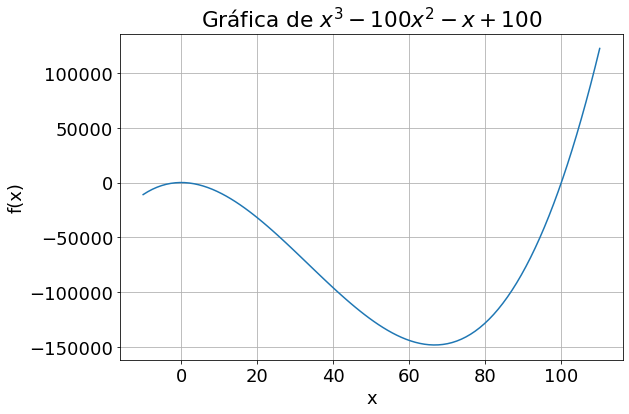

In [6]:
showplot()

### Métodos combinados
Los metodos más sofisticados para búsqueda de raices combinan métodos de intervalo abierto y cerrado. Por un lado, el método de intervalo abierto permite una convergencia más rápida, mientras que el método de intervalo cerrado permite acotar la solución. 

En términos generales, los métodos combinados operan de la siguente forma.
- Se subdivide el dominio de la función para identificar intervalos donde existan raices.
- Se procede con la iteración mediante un método de intervalo abierto
- Si la solución se mueve fuera del intervalo acotado, se procede a iterar con un método de intervalo cerrado.

Por ejemplo, el **método de Brent's** combina un método de intervalo abierto, como Newton-Raphson o el método de la secante, con el método de la bisección. Más información en las referencias

### Error relativo y absoluto
En los códigos de bisección y Newton-Raphson definimos el criterio de convergencia $f(x_0) = 0$. Sin embargo, este criterio no es correcto, ya que la definición de $f(x_0) \approx 0$ es relativa a la escala de $f(x)$ en el dominio donde estemos trabajando. Dicho de otra manera, para cualquier punto $x_i$, siempre tendremos $f(x_i)\approx 0$ si nos alejamos lo suficiente de la gráfica de la función.

Un criterio más adecuado, en cambio, sería definir el error relavo al valor exácto de la raíz $x^*$. Sin embargo, debido a que este valor es deconocido, definimos el **error absoluto** para cada nuevo valor $x_{k+1}$ como:

\begin{equation}
|x_{k+1} -x_{k}|
\end{equation}

Alternativamente, podemos definir el **error relativo** de la forma:

\begin{equation}
\frac{|x_{k+1} -x_{k}|}{|x_{k+1}|}
\end{equation}

En general, no existe una regla respecto al tipo de error que se debe usar como criterio de convergencia. La recomendación es usar el error absoluto se tiene conocimiento de la función. Esto porque, a veces, el error relativo puede imponer condiciones demaciado estrictas para la convergencia.

### Búsqueda de raíces de función escalar en python
En python, la función ```root_scalar``` de la librería ```scipy.optimize```, permite determinar raíces de una función escalar. Esta función tiene implementada distintos métodos de intervalo abierto, cerrado y combinados, tales como: bisección, Newton-Raphson, secante y Brent's.

Así, la función puede aceptar:
- Un valor inicial $x_0$, y la derivada
- Dos valores iniciales $x_0$ y $x_1$
- Un intervalo. 

Dependiendo de este input, la función decide el tipo de método más adecuado.

También podemos especificar el tipo de método a utilizar mediante la instrucción ```method='tipo_de_metodo'``` como argumento en la función



Por ejemplo, analizamos la raíz de la función $f(x) = x^3 - 1$.

In [7]:
from scipy.optimize import root_scalar
f  = lambda x: x**3 - 1 # función a resolver
df = lambda x: 3*x**2   # derivada

In [8]:
print('Bisección:\n', root_scalar(f,bracket=[0, 3],method='bisect'))
print('Newton-Raphson:\n', root_scalar(f,x0=0.2,fprime=df,method='newton'))
print('Secante:\n', root_scalar(f,x0=0.2,x1=0.21,method='secant'))

Bisección:
       converged: True
           flag: 'converged'
 function_calls: 43
     iterations: 41
           root: 1.0000000000004547
Newton-Raphson:
       converged: True
           flag: 'converged'
 function_calls: 22
     iterations: 11
           root: 1.0
Secante:
       converged: True
           flag: 'converged'
 function_calls: 23
     iterations: 22
           root: 1.0


In [9]:
print('Brent´s:\n', root_scalar(f,bracket=[0, 3],method='brentq'))
print('Intervalo (método por defecto):\n', root_scalar(f,bracket=[0, 3]))
print('Cond. inicial y derivada (método po defecto):\n', root_scalar(f,x0=0.2,fprime=df))

Brent´s:
       converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 1.0
Intervalo (método por defecto):
       converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 1.0
Cond. inicial y derivada (método po defecto):
       converged: True
           flag: 'converged'
 function_calls: 22
     iterations: 11
           root: 1.0


Si hacemos ```sol = root_scalar```, la variable ```sol``` almacena la información de la función:

In [10]:
sol = root_scalar(f,bracket=[0, 3])
print('raíz x*=%.3f' % sol.root)
print('número de iteraciones %i' % sol.iterations)

raíz x*=1.000
número de iteraciones 10


También podemos extraer el valor de la raíz directamente mediante ```root_scalar(...).root```

In [11]:
print('raíz x*=%.3f' % root_scalar(f,bracket=[0, 3]).root)

raíz x*=1.000


Para controlar la tolerancia en ```root_scalar``` podemos usar:
- ```xtol``` para el error absoluto, por ejemplo:
```python
sol = root_scalar(f,bracket=[0, 3],xtol=1E-5) # error absoluto de 0.00001 
```
- ```rtol``` para el error realtivo, por ejemplo:
```python
sol = root_scalar(f,bracket=[0, 3],rtol=0.001) # error relativo de 0.1%
```

También podemos usar combinaciones de ambas. En ese caso, la iteración finalizará cuando se cumpla cualquiera de los dos criterios. 

Por último, también podemos definir el numero máximo de iteraciones mediante ```maxiter```:
```python
sol = root_scalar(f,bracket=[0, 3],maxiter=1000) # máximo 1000 iteraciones
```

Para mayor información revisar la [documentación oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html).

## Búsqueda de raíces para funciones vectoriales
Una función vectorial es una función con una o más variables dependientes, que entrega un vector de múltiples dimensiones.
\begin{equation*}
f: x\in \mathbb{R}^n \rightarrow \mathbb{R}^m
\end{equation*}

Consideremos el siguiente sistema de ecuaciones:
\begin{align*}
x\log(y^2-1) &= 3 \\
y\sin(2x^3) + e^y &= 2
\end{align*}

Resolver este sistema, es equivalente a encontrar las raices de una función vetorial del tipo:
\begin{equation*}
\vec{F}(x,y) = \Bigg\{
\begin{matrix}
f(x,y) &= x\log(y^2-1) - 3 \\
g(x,y) &= y\sin(2x^3) + e^y - 2
\end{matrix}
\end{equation*}

Así, resolver un sistema de ecuaciones de $n$ incognitas, es equivalente a encontrar las raices de una función vectorial del tipo:

\begin{equation*}
f: x\in \mathbb{R}^n \rightarrow \mathbb{R}^n
\end{equation*}

En este capítulo revisaremos los aspectos generales de los métodos numéricos para resolver este problema.

### Métodos de búsqueda lineal
Para un vector $\vec{x} = \{x_1, x_2, ... x_n\}$, y una función vectorial $\vec{F}\left(\vec{x}\right) = \big\{f_1\left(\vec{x}\right),f_2\left(\vec{x}\right), ... f_n\left(\vec{x}\right)\big\}$, consideremos la forma generalizada del método de Newton-Raphson:

\begin{equation*}
\vec{x}_k = \vec{x}_{k-1} - {\left[\bar{J}(\vec{x}_{k-1})\right]}^{-1}\cdot \vec{F}\left(\vec{x}_{k-1}\right) 
\end{equation*}

donde $\bar{J} = \nabla\vec{F}$ es el **Jacobiano** de $\vec{F}$. 

Por ejemplo, para una función vectorial $\vec{F}(x,y) = \big\{f(x,y), g(x,y)\big\}$:

\begin{equation*}
\bar{J}(x,y) = 
\left[
\begin{matrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{matrix}\right]
\end{equation*}

En términos simples, el Jacobiano es la derivada de una función vectorial.

En otras palabras, el método generalizado de Newton-Raphson consiste en encontrar un nuevo vector $\vec{x}_{k+1}$ a partir de la pendiente descendiente definida en el vector $\vec{x}_{k}$.

Sin embargo, a diferencia del caso unidimensional, el Jacobiano entrega multiples direcciones posibles. ¿Como saber cuál es la dirección que minimiza $\vec{F}$?

Para definir la dirección descendiente se considera el criterio:

\begin{equation*}
\mathrm{min}[f] = \mathrm{min}\left[\vec{F}\cdot\vec{F}\right] 
\end{equation*}

Así, el problema de busqueda de raíces de una función vectorial se transforma en un problema de minimización.

Esta es la estrategia de los métodos de Búsqueda lineal.

Entre los más conocidos tenemos el **método de Broyden**. Más información en las referencias

## Métodos de región de confianza

Un problema de los métodos de busqueda lineal está en el cálculo del Jacobiano de la función. Los métodos de región de confianza se basan en una aproximación de $\vec{F}$ en forma de paraboloide. Esta aproximación simplifica el cálculo del Jacobiano. 

Se define como **región de confianza a la región donde la función puede ser aproximada por un parabolide**.

En términos generales, los métodos de región de confianza operan de la siguiente forma:

- Se define una región de confianza inicial y se busca un mínimo dentro esa región.
- Si el valor encontrado miniza $\vec{F}\cdot\vec{F}$, se construye una aproximación hyperboloide de $\vec{F}$ y se incrementa la región de confianza.
- Si el valor encontrado no miniza $\vec{F}\cdot\vec{F}$, se reduce la región de confianza, y se vuelve a buscar el mínimo.
- El algoritmo itera hasta encontrar un mínimo global de $\vec{F}$.

En general, los métodos de región de confianza son más estables que los métodos de búsqueda lineal, y son los métodos por defecto en funciones de python.

Mayor información sobre estos métodos [acá](http://www.applied-mathematics.net/optimization/optimizationIntro.html)

### Búsqueda de raíces de función vectorial en python
En python, la función ```fsolve``` de la librería ```scipy.optimize``` permite encontrar las raíces de una función vectorial.

La función se basa en los algoritmos de región de confianza "hybrd" y "hybrj" de la libreria ```MINPACK```. Más detalles [acá](https://www.math.utah.edu/software/minpack/minpack/hybrj.html)

La función ```fsolve``` requiere, como mínimo, la función vectorial y los valores iniciales.

In [4]:
import numpy as np
from scipy.optimize import fsolve
def func(x):
    return [x[0] * np.cos(x[1]) - 4,
            x[1] * x[0] - x[1] - 5]
root = fsolve(func, [1, 1])
print('la solución es: ', root)

la solución es:  [6.50409711 0.90841421]


También podemos definir el error absoluto mediante la instrucción ```xtol``` (por defecto, ```xtol=1.49012e-08```).
```python
root = fsolve(func, [1, 1], xtol = 1E-10) # |xk+1 - xk| < 1E-10
```

Para mayor información, revisar la [documentación oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

## Referencias
- Kong Q., Siauw T., Bayen A. M. **Chapter 19: Root Finding** in *[Python Programming and Numerical Methods – A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.00-Interpolation.html)*, 1st Ed., Academic Press, 2021

- Chapra S., Canale R. **Parte dos: Raíces de ecuaciones** en *Métodos Numéricos para Ingenieros*, 6ta Ed., McGraw Hill, 2011

- Williams H. P. **Chapter 9: Root Finding and Nonlinear Sets of Equations** in "Numerical Recipes" 3rd Ed, Cambridge University Press, 2007